<a href="https://colab.research.google.com/github/Konic-NLP/Machine_Learning/blob/main/machine_learning_in_actions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# 1. KNN
 #compute the distance between the undetermined point and other known points, then pick the majority classes in the top K nearest points.  

 #not sensitive to the outlier. while the computation cost and memory occupy is huge.

from numpy import *
import operator
def knnclassify(inx, dataset, labels, k):
  datasize= dataset.shape[0]
  diffmat= tile(inx, (datasize-1))-dataset
  sqdiffmat=diffmat**2
  sqdist= sqdiffmat.sum(axis=1)
  distance= sqdist**0.5
  sorteddist=distance.argsort()  # distance sort from high to low
  classcount={}
  for i in range(k): # get the top K most similar data
    currentlabel=labels[sorteddist[i]]
    classcount[currentlabel] = classcount.get(currentlabel,0)+1  # use get to set the default value to avoid the keyerror
  sortedclasscount= sorted(classcount.items(), key=operator.itemgetter(1),reverse= True)  # sort the classlabel according to the frequency
  return sortedclasscount[0][0]   # return the top class
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector




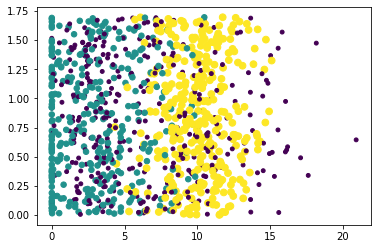

In [ ]:
# visualize the data via matplotlib
import matplotlib 
import matplotlib.pyplot as plt
datingmatrix,datinglabels= file2matrix('datingTestSet2.txt')
# print(datingmatrix,datinglabels)
fig=plt.figure()
ax= fig.add_subplot(111)
ax.scatter(datingmatrix[:,1],datingmatrix[:,2],15.0*array(datinglabels),15.0*array(datinglabels))
plt.show()

In [ ]:
# standardarize
# new value= oldvalue -min / max-min
def Norm(dataset):
  minvalue=dataset.min(0)
  maxvalue= dataset.max(0)
  range= maxvalue- minvalue
  normdataset= zeros(shape(dataset))
  m = dataset.shape[0]  # the num of samples
  normdataset=dataset- tile(minvalue,(m,1))
  normdataset= normdataset/tile(range, (m,1))
  return normdataset,range, minvalue

In [ ]:
normdataset, range, minvalue= Norm(datingmatrix)
print(normdataset)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


In [ ]:
def knn_predict():
  ratio=0.10
  datingmatrix,datinglabels=file2matrix('datingTestSet2.txt')
  normdata,ranges,minvalues= Norm(datingmatrix)
  m=normdata.shape[0]
  print(m)
  numtestvec= int(m*ratio)
  # print(testvec)
  error_rate= 0.0

  for i in range(100):
    classify_result= knnclassify(normdata[i,:],normdata[100:m,:], datinglabels[100:m],3)
    if classify_result != datinglabels[i]:
      error_rate+=1.0


In [ ]:
#2. decision tree.